# Exploratory Data Analysis - Retail

### Author : Apoorva Srinivas
#### Data Science & Business Analytics internship by The Sparks Foundation
#### June 2021

#### Summary
- **Problem Statement:** Perform EDA on a retail dataset- "SampleSuperstore" and 
    figure out weak areas where profit margins can be improved.
- **Tools Used:** Python, Jupyter Notebook
- **Packages Used:** numPy, Pandas, matplotlib, seaborn

## Data Understanding

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the SampleSuperstore.csv file into the store dataframe
store = pd.read_csv("SampleSuperstore.csv")
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Verify Number of rows and columns in the dataframe
store.shape

(9994, 13)

In [5]:
# Check each column summary
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Describe the store data
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Drop country and postal code since it is not useful for our analysis
store.drop(['Country','Postal Code'], axis=1, inplace=True)
store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Outlier Analysis

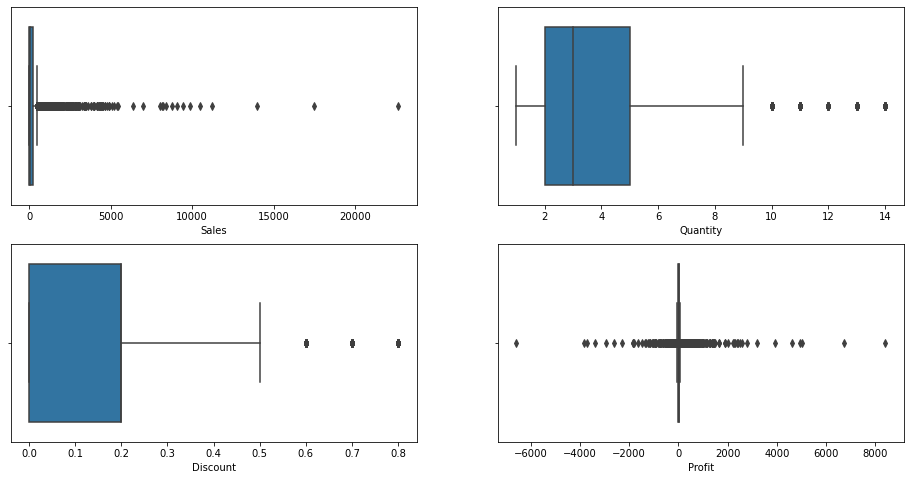

In [8]:
#Boxplot for Sales, Profit, Quantity, Discount
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sns.boxplot(store.Sales)
plt.subplot(2,2,2)
sns.boxplot(store.Quantity)
plt.subplot(2,2,3)
sns.boxplot(store.Discount)
plt.subplot(2,2,4)
sns.boxplot(store.Profit)

plt.show()

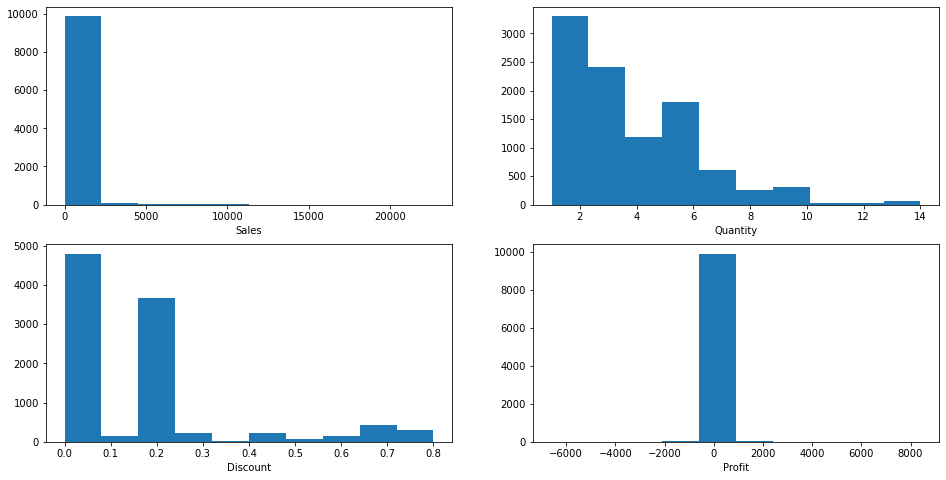

In [9]:
#Histogram for Sales, Profit, Quantity, Discount
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
plt.hist(store.Sales)
plt.xlabel("Sales")
plt.subplot(2,2,2)
plt.hist(store.Quantity)
plt.xlabel("Quantity")
plt.subplot(2,2,3)
plt.hist(store.Discount)
plt.xlabel("Discount")
plt.subplot(2,2,4)
plt.hist(store.Profit)
plt.xlabel("Profit")
plt.show()

#### Inferences:
- Majority of the sales are of low value, that is, below 60.
- Most of the quantities of the orders are less than 3
- The discounts provided are mostly below 0.2
- The median of the profit is negligible at a value of 8.6

## Univariate Analysis

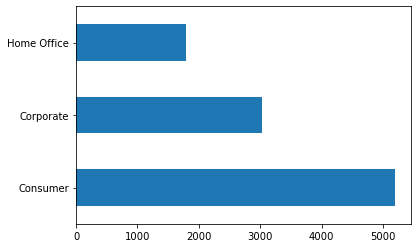

In [10]:
store.Segment.value_counts().plot.barh()
plt.show()

- Most of the orders come from consumers who purchase the products directly.

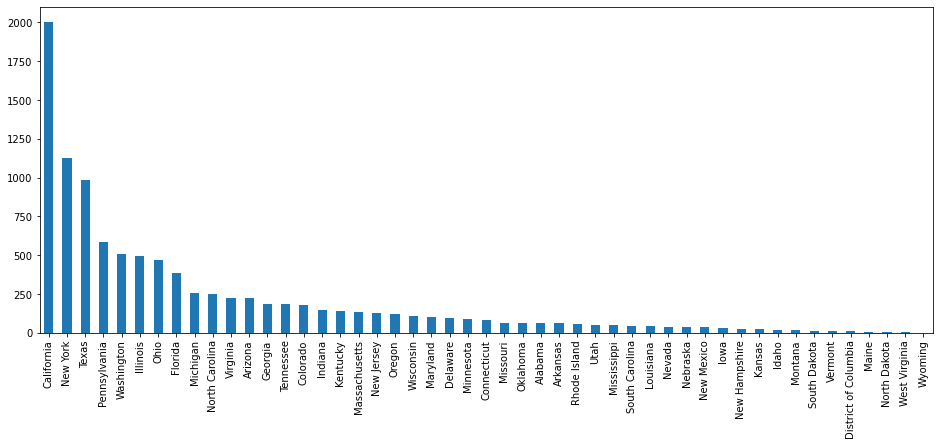

In [11]:
plt.figure(figsize=[16,6])
store.State.value_counts().plot.bar()
plt.show()

- The state of California is giving the most number of sales, followed by New York in the country.

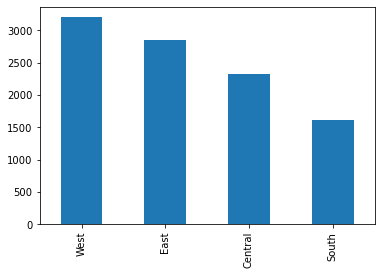

In [12]:
store.Region.value_counts().plot.bar()
plt.show()

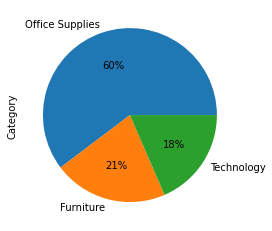

In [13]:
store.Category.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

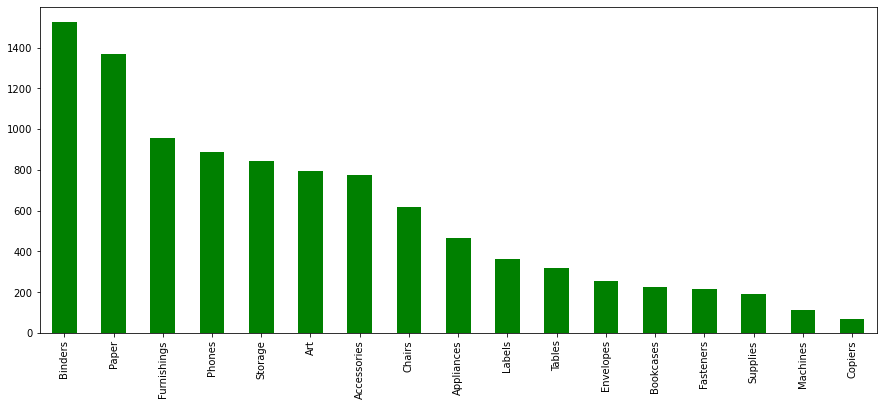

In [14]:
plt.figure(figsize=[15,6])
store['Sub-Category'].value_counts().plot.bar(color='green')
plt.show()

- Most of the orders come for Office Supplies, specifically binders and paper.

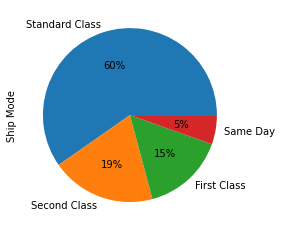

In [15]:
store['Ship Mode'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show()

- Standard Class is the most common shipping mode.

## Bivariate Analysis

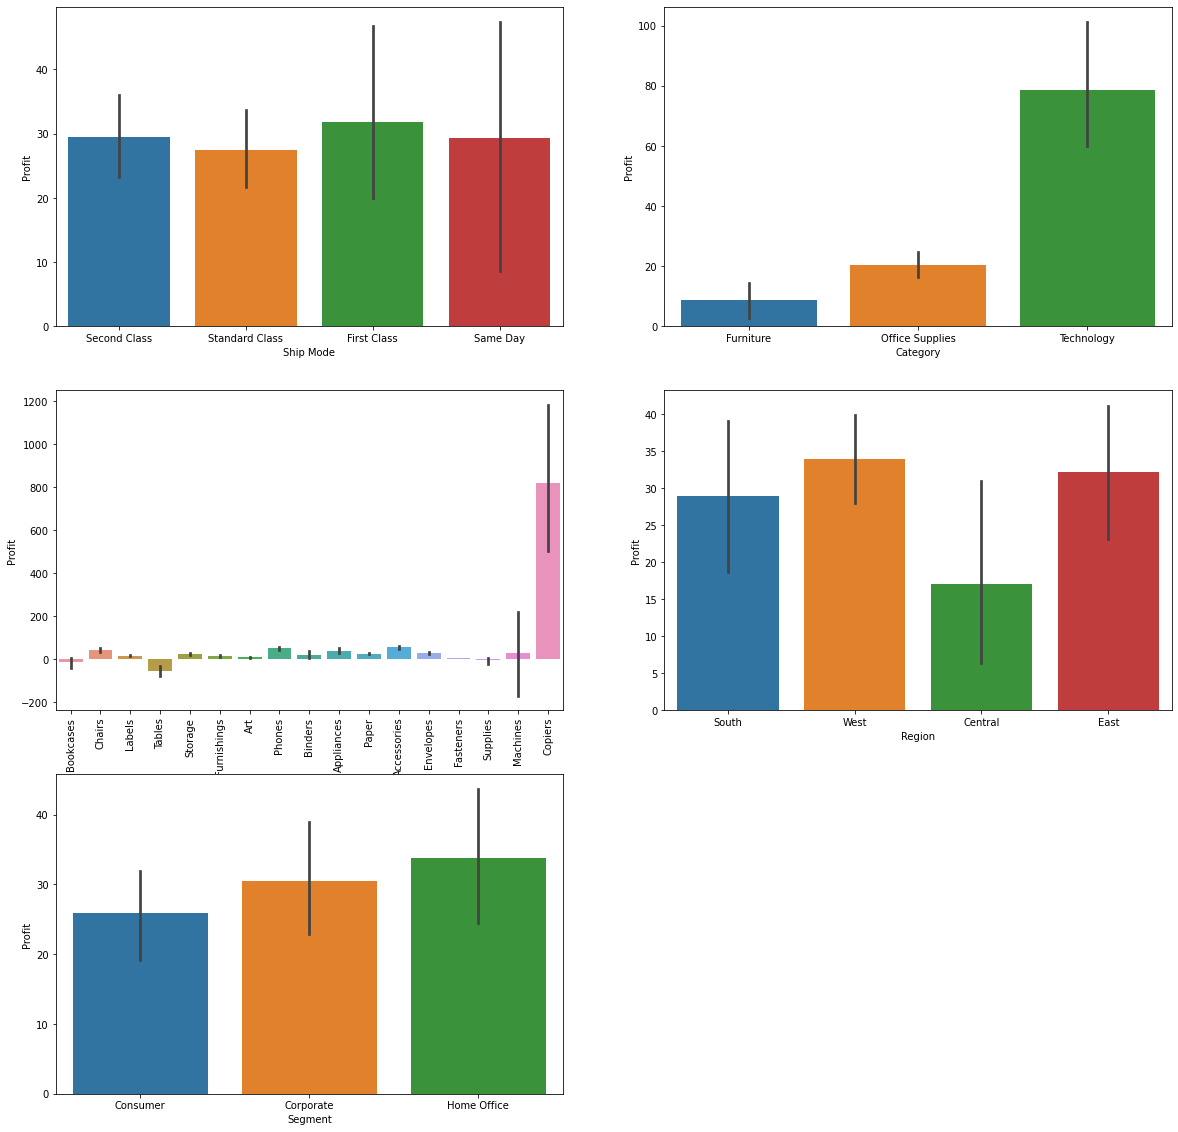

In [16]:
#Visualizing categorical features against Profit

plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.barplot(y = 'Profit', x = 'Ship Mode', data = store)
plt.subplot(3,2,2)
sns.barplot(y = 'Profit', x = 'Category', data = store)
plt.subplot(3,2,3)
sns.barplot(y = 'Profit', x = 'Sub-Category', data = store)
plt.xticks(rotation=90)
plt.subplot(3,2,4)
sns.barplot(y = 'Profit', x = 'Region', data = store)
plt.subplot(3,2,5)
sns.barplot(y = 'Profit', x = 'Segment', data = store)
plt.show()

1. First Class Shipping mode gives a slightly greater profit compared to other shipping modes.
2. Technology Category of products, specifically copiers are giving the highest returns.
3. Since California and New York have the highest sales, the west and the east regions show greater profits.
4. The orders in the Home Office Segment display highest profits.

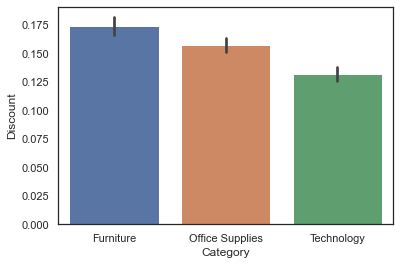

In [17]:
#Discount Vs Category
sns.set_theme(style="white")
sns.barplot(x="Category", y="Discount", data=store)
plt.show()

- The discount provided for the Furniture category is the highest.

<Figure size 1152x720 with 0 Axes>

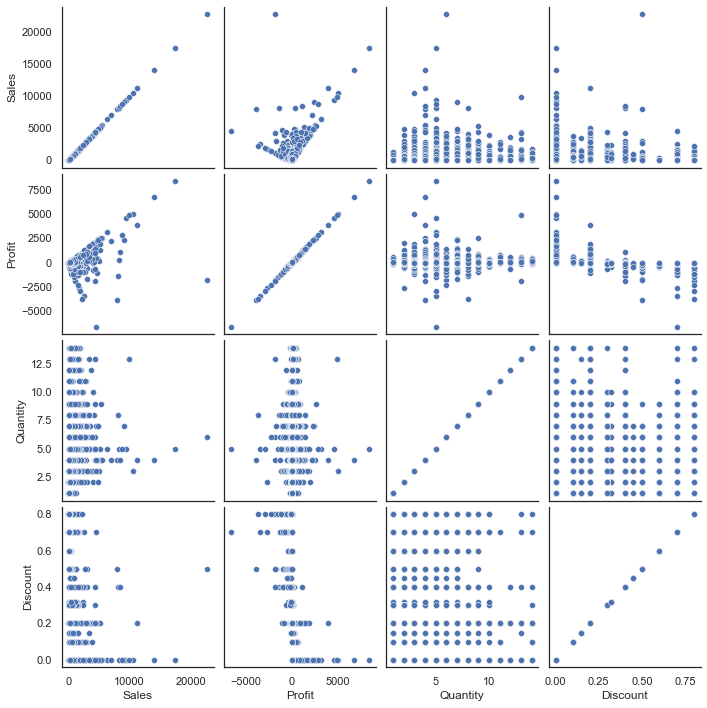

In [18]:
#Visualizing numerical features
plt.figure(figsize = (16, 10))
sns.pairplot(data=store, vars=['Sales', 'Profit','Quantity', 'Discount'],kind='scatter', diag_kind=None)
plt.show()

- As the discount increases, the profit has decreased. This maybe because the consumers do not trust the product with respect to quality when the discount is high.

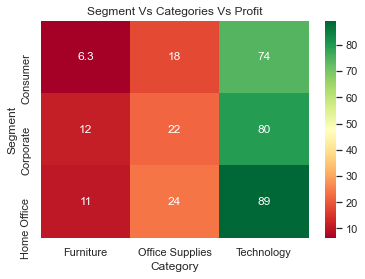

In [19]:
# Heatmap for Category vs Segment vs Profit
res = pd.pivot_table(data=store, index="Segment", columns="Category", values="Profit")
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.title("Segment Vs Categories Vs Profit")
plt.show()

- Technology category of products in the Home Office segment is fetching the highest profits.

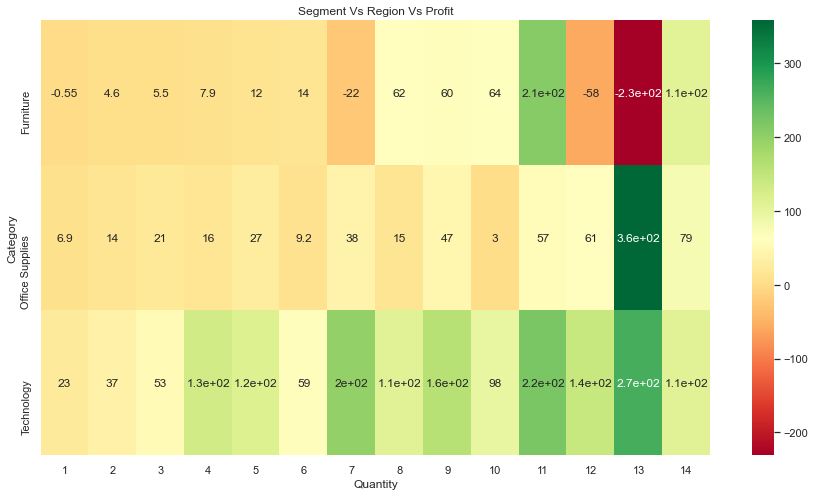

In [20]:
# Heatmap for Region vs Segment vs Profit
plt.figure(figsize=[15,8])
res = pd.pivot_table(data=store, index="Category", columns="Quantity", values="Profit")
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.title("Segment Vs Region Vs Profit")
plt.show()

- Since majority of the sales are for "Office Supplies", the store should aim at selling a quantity of 13 to avail maximum average profit.

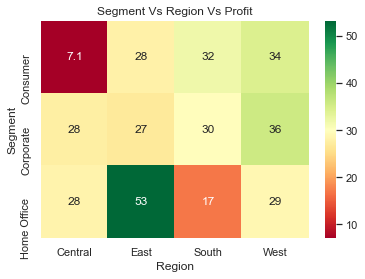

In [21]:
# Heatmap for Region vs Segment vs Profit
res = pd.pivot_table(data=store, index="Segment", columns="Region", values="Profit")
sns.heatmap(res, annot=True, cmap= "RdYlGn")
plt.title("Segment Vs Region Vs Profit")
plt.show()

- The East region shows maximum average profit in the Home Office segment. 
- The store must change their marketing strategies for consumers in the Central region since their average profit is the least.

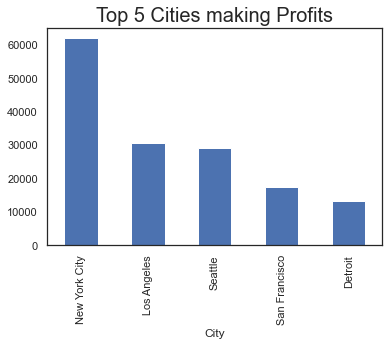

In [22]:
#Top 5 cities making profits
store.groupby("City")["Profit"].sum().sort_values(ascending=False).head().plot.bar()
plt.title("Top 5 Cities making Profits", fontsize=20)
plt.show()

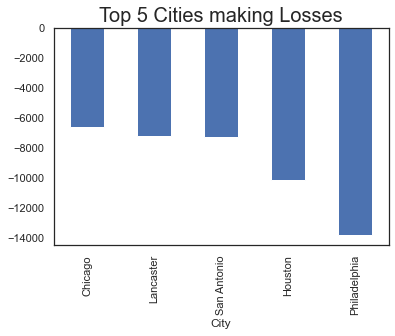

In [23]:
#Top 5 cities making losses
store.groupby("City")["Profit"].sum().sort_values(ascending=False).tail().plot.bar()
plt.title("Top 5 Cities making Losses", fontsize=20)
plt.show()

In [24]:
store.groupby("City")["Profit"].sum().sort_values(ascending=False).tail()

City
Chicago         -6654.5688
Lancaster       -7239.0684
San Antonio     -7299.0502
Houston        -10153.5485
Philadelphia   -13837.7674
Name: Profit, dtype: float64

### Analysis on the top 5 cities with losses

In [25]:
#Create a dataframe with top 5 cities with losses
loss_store = store[store["City"].isin(['Chicago', 'Lancaster','San Antonio','Houston','Philadelphia'])]

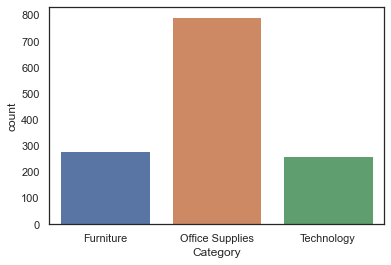

In [26]:
#Number of sales in a Category
sns.countplot(loss_store.Category)
plt.show()

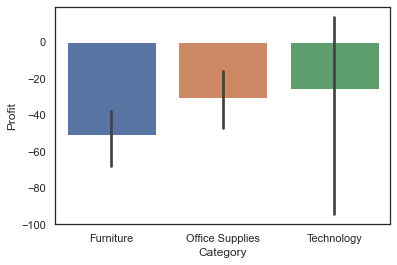

In [27]:
#Profit Vs Category
sns.barplot(y = 'Profit', x = 'Category', data = loss_store)
plt.show()

- Loss incurred from Furniture category is the highest among the top 5 cities with losses.
- The store could reduce the discount provided for Furniture since it is relatively high.

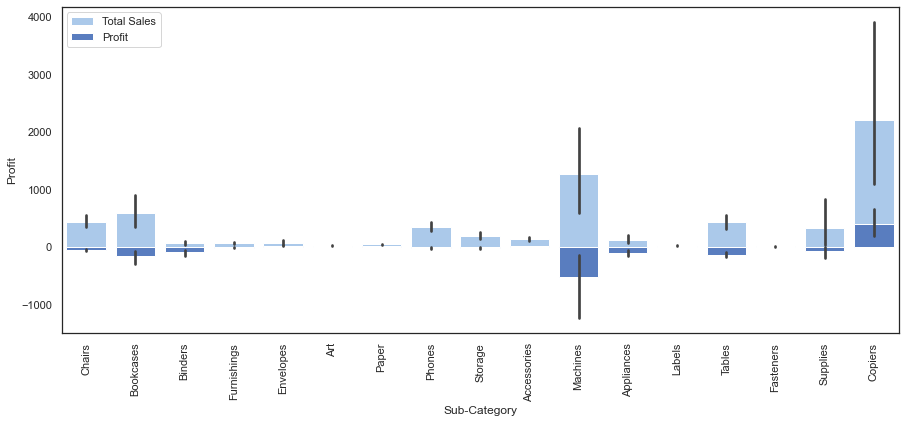

In [28]:
#Total Sales with Profit in each Sub-Category
f, ax = plt.subplots(figsize=(15, 6))

sns.set_color_codes("pastel")
sns.barplot(y="Sales", x="Sub-Category", data=loss_store,
            label="Total Sales", color="b")

sns.set_color_codes("muted")
sns.barplot(y="Profit", x="Sub-Category", data=loss_store,
            label="Profit", color="b")
plt.xticks(rotation=90)

# Add a legend and informative axis label
ax.legend()
plt.show()

- Although the total sales of Machines is high, there is a huge loss incurred compared to the other sub-categories. The store must re-evaluate the pricing, discount, and other business parameters for this sub-category of product.

## Conclusions

The following are some of the insights drawn after conducting the EDA:

- The store should reduce the discounts on the Furniture category of products. The high discounts are leading to high losses. 
- Since Copiers are fetching the highest profits and Consumer segment are placing highest orders, the store must promote 'Copiers' to the Consumer segment.
- The store must try to increase their sales in the 'Corporate' and 'Home Office' segments since they give the highest profits.